In [19]:
import sys
sys.path.append('../src')

from preprocessing import annotation_preprocess
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
adata_raw = sc.read_h5ad("PBMC_simulated_cnas_041025.h5ad")
adata = annotation_preprocess(adata_raw, plot=False)
adata.obs['cell_type'].value_counts()

Before filtering:  (10309, 20104)
After filtering:  (10309, 19776)


/Users/apple/Documents/GitHub/CNA_tool/tests/../src/preprocessing.py:57: FutureWarning: The specified parameters ('min_dist',) are no longer positional. Please specify them like `min_dist=0.25`
  sc.tl.umap(data_processed, 0.25, init_pos='paga')


cell_type
CD4 T cell         3554
CD14 monocyte      3128
B cell             1450
CD8 T cell         1029
NK cell             608
FCGR3A monocyte     327
Dendritic           154
Megakaryocyte        59
Name: count, dtype: int64

In [13]:
adata_raw.obs

,n_genes_by_counts,total_counts,total_counts_ribo,pct_counts_ribo,total_counts_mt,pct_counts_mt,n_genes,n_counts,cell_type,simulated_cnvs
AAACCCAAGCGCCCAT-1,1005,1760.0,392.0,17.785845,52.0,2.359347,1005,1760.0,CD4 T cell,
AAACCCAAGGTTCCGC-1,4101,14240.0,4526.0,22.528622,1324.0,6.590343,4101,14240.0,Dendritic,
AAACCCACAGAGTTGG-1,1742,4208.0,1043.0,17.726036,633.0,10.757988,1742,4208.0,CD14 monocyte,22:19807132-29743868 (CN 0)
AAACCCACAGGTATGG-1,2122,4354.0,742.0,13.417721,434.0,7.848101,2122,4354.0,NK cell,
AAACCCACATAGTCAC-1,1521,2819.0,1734.0,33.960049,553.0,10.830396,1521,2819.0,B cell,
...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTGCGTCGT-1,1245,2279.0,2471.0,48.308895,365.0,7.135875,1245,2279.0,CD4 T cell,
TTTGTTGGTGTCATGT-1,1245,2548.0,606.0,15.392430,783.0,19.888241,1245,2548.0,CD14 monocyte,"22:19807132-29743868 (CN 0), 6:25435484-350352..."
TTTGTTGGTTTGAACC-1,1308,2468.0,1402.0,33.027092,375.0,8.833922,1308,2468.0,CD8 T cell,
TTTGTTGTCCAAGCCG-1,1577,3093.0,1985.0,35.433773,524.0,9.353803,1577,3093.0,CD4 T cell,X:106533974-112956833 (CN 4)


In [14]:
adata_raw.obs["simulated_cnvs"].value_counts()

simulated_cnvs
                                                           6312
X:106533974-112956833 (CN 4)                               1731
6:25435484-35035259 (CN 1)                                  895
22:19807132-29743868 (CN 0), 6:25435484-35035259 (CN 1)     700
22:19807132-29743868 (CN 0)                                 671
Name: count, dtype: int64

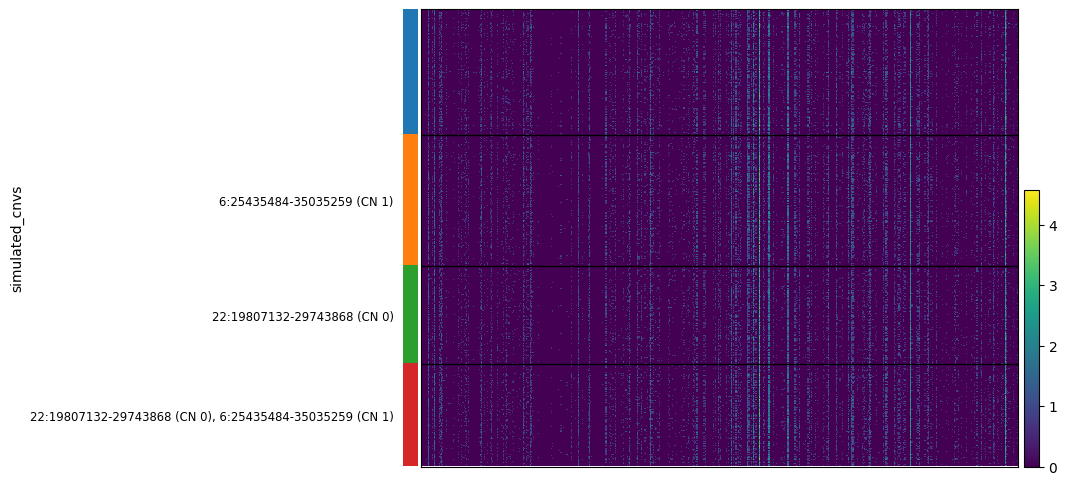

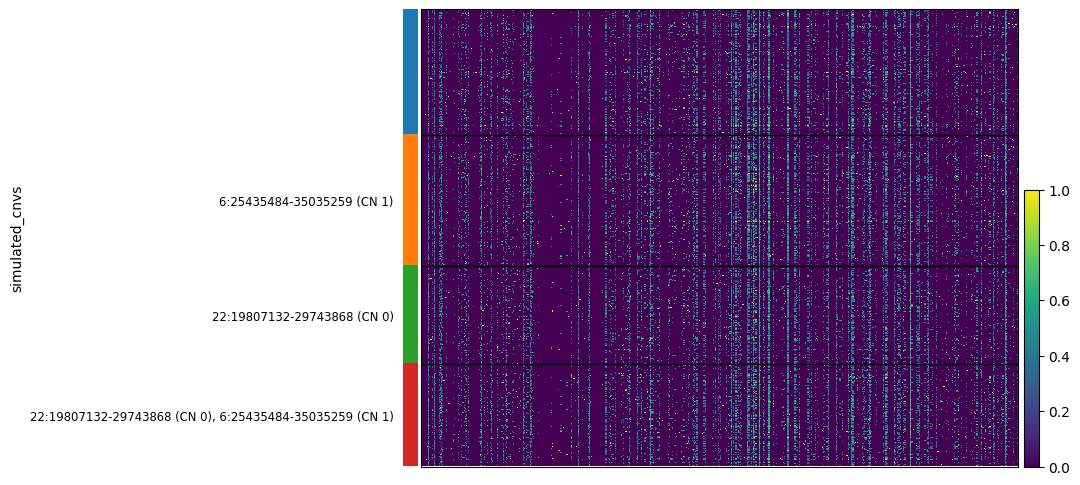

In [12]:
# get slice of cd14 monocytes and Chr22
adMono = adata[adata.obs['cell_type'] == 'CD14 monocyte'].copy()
adChr22 = adMono[:,adMono.var['chromosome']=='22'].copy()
# Raw counts on left
sc.pl.heatmap(adChr22, adChr22.var_names, groupby='simulated_cnvs',layer="counts", log=True)
# gene-scaled on right makes the CNA footprint more apparent
sc.pl.heatmap(adChr22, adChr22.var_names, groupby='simulated_cnvs',layer="counts", log=True, standard_scale='var')


In [16]:
adata.var

,gene_ids,feature_types,genome,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,chromosome,start,end,strand,highly_variable,means,dispersions,dispersions_norm
original_index,,,,,,,,,,,,,,,,,,
AL627309.1,ENSG00000238009,Gene Expression,GRCh38,False,False,52,0.005141,99.495586,53.0,52,nan,NaN,NaN,NaN,False,0.011588,1.078844,-0.050194
AL627309.3,ENSG00000239945,Gene Expression,GRCh38,False,False,4,0.000388,99.961199,4.0,4,1,89551.0,91105.0,-1.0,False,0.000653,0.686762,-1.377244
AL669831.5,ENSG00000237491,Gene Expression,GRCh38,False,False,597,0.062276,94.208944,642.0,597,1,778739.0,810066.0,1.0,False,0.118781,1.075170,-0.062629
FAM87B,ENSG00000177757,Gene Expression,GRCh38,False,False,11,0.001164,99.893297,12.0,11,1,817363.0,819842.0,1.0,False,0.001655,0.687997,-1.373067
LINC00115,ENSG00000225880,Gene Expression,GRCh38,False,False,300,0.030653,97.089921,316.0,300,1,586945.0,827989.0,-1.0,False,0.060840,1.008250,-0.289128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC011043.1,ENSG00000276256,Gene Expression,GRCh38,False,False,71,0.007275,99.311281,75.0,71,GL000195.1,42939.0,49164.0,-1.0,False,0.015607,1.109757,0.054435
AL592183.1,ENSG00000273748,Gene Expression,GRCh38,False,False,26,0.002522,99.747793,26.0,26,GL000219.1,54224.0,83311.0,-1.0,False,0.006186,1.230244,0.462238
AC007325.4,ENSG00000278817,Gene Expression,GRCh38,False,False,217,0.021729,97.895043,224.0,217,KI270734.1,131494.0,137392.0,1.0,False,0.037462,0.868006,-0.763800


In [17]:
# Drop genes with missing start or chromosome information
adata = adata[:, ~adata.var['start'].isna() & ~adata.var['chromosome'].isna()]

# Then convert types safely
adata.var['chromosome'] = adata.var['chromosome'].astype(str)
adata.var['start'] = adata.var['start'].astype(int)


/var/folders/wp/jgd9vlmx5dg2bkcxsz0t0yg80000gn/T/ipykernel_51015/3819339585.py:5: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['chromosome'] = adata.var['chromosome'].astype(str)


In [18]:
# Sort genes by chromosome and start position
adata.var['chromosome'] = adata.var['chromosome'].astype(str)
adata.var['start'] = adata.var['start'].astype(int)
adata.var_sorted = adata.var.sort_values(by=['chromosome', 'start'])

# Apply the sorting to both var and X
adata = adata[:, adata.var_sorted.index]


In [20]:
def smooth_by_chromosome(adata, window=100):
    smoothed = []
    for chrom in sorted(adata.var['chromosome'].unique()):
        gene_mask = adata.var['chromosome'] == chrom
        X_chrom = adata[:, gene_mask].X.toarray()

        # Smooth using rolling mean
        df = pd.DataFrame(X_chrom)
        df_smooth = df.rolling(window=window, axis=1, min_periods=1, center=True).mean()
        smoothed.append(df_smooth.values)
    
    return np.hstack(smoothed)

smoothed_expr = smooth_by_chromosome(adata, window=100)


/var/folders/wp/jgd9vlmx5dg2bkcxsz0t0yg80000gn/T/ipykernel_51015/57526984.py:9: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  df_smooth = df.rolling(window=window, axis=1, min_periods=1, center=True).mean()
/var/folders/wp/jgd9vlmx5dg2bkcxsz0t0yg80000gn/T/ipykernel_51015/57526984.py:9: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  df_smooth = df.rolling(window=window, axis=1, min_periods=1, center=True).mean()
/var/folders/wp/jgd9vlmx5dg2bkcxsz0t0yg80000gn/T/ipykernel_51015/57526984.py:9: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  df_smooth = df.rolling(window=window, axis=1, min_periods=1, center=True).mean()
/var/folders/wp/jgd9vlmx5dg2bkcxsz0t0yg80000gn/T/ipykernel_51015/57526984.py:9: FutureWa

In [21]:
# Z-score
z_expr = (smoothed_expr - smoothed_expr.mean(axis=1, keepdims=True)) / smoothed_expr.std(axis=1, keepdims=True)

# Mark gains/losses by threshold
gain_mask = z_expr > 2.0
loss_mask = z_expr < -2.0


In [22]:
from scipy.ndimage import label

def detect_cna_regions(z_expr, gene_chroms, threshold=2.0, min_cells=100):
    cna_list = []
    start_idx = 0

    for chrom in sorted(set(gene_chroms)):
        idxs = np.where(gene_chroms == chrom)[0]
        z_chr = z_expr[:, idxs]

        # Aggregate signal
        gain_counts = (z_chr > threshold).sum(axis=0)
        loss_counts = (z_chr < -threshold).sum(axis=0)

        # Identify contiguous bins with gain/loss
        for cna_type, counts in zip(['gain', 'loss'], [gain_counts, loss_counts]):
            active = counts > min_cells
            labeled, n = label(active)
            for i in range(1, n + 1):
                region_idx = idxs[labeled == i]
                cna_list.append({
                    'chrom': chrom,
                    'start_gene': region_idx[0],
                    'end_gene': region_idx[-1],
                    'type': cna_type
                })
    return cna_list

gene_chroms = adata.var['chromosome'].values
cna_calls = detect_cna_regions(z_expr, gene_chroms)


In [24]:
def assign_cells_to_cnas(z_expr, cna_calls, threshold=2.0):
    cell_assignments = {}

    for i, cna in enumerate(cna_calls):
        idx = slice(cna['start_gene'], cna['end_gene'] + 1)
        scores = z_expr[:, idx].mean(axis=1)
        if cna['type'] == 'gain':
            cells = np.where(scores > threshold)[0]
        else:
            cells = np.where(scores < -threshold)[0]
        
        region_str = f"{cna['chrom']}:{cna['start_gene']}-{cna['end_gene']} ({cna['type']})"
        cell_assignments[region_str] = adata.obs_names[cells].tolist()
    
    return cell_assignments

cell_cna_map = assign_cells_to_cnas(z_expr, cna_calls)


In [38]:
print(cell_cna_map.keys())

dict_keys(['1:7-8 (gain)', '1:264-457 (gain)', '1:467-493 (gain)', '1:497-498 (gain)', '1:508-508 (gain)', '1:510-522 (gain)', '1:524-525 (gain)', '1:1113-1141 (gain)', '1:1147-1273 (gain)', '1:1344-1385 (gain)', '1:1388-1389 (gain)', '1:1392-1430 (gain)', '1:1823-1823 (gain)', '1:1831-1845 (gain)', '1:0-6 (loss)', '1:1933-1963 (loss)', '10:1964-2014 (gain)', '10:2016-2017 (gain)', '10:2019-2020 (gain)', '10:2024-2028 (gain)', '10:2045-2045 (gain)', '10:2050-2053 (gain)', '10:2065-2066 (gain)', '10:2224-2224 (gain)', '10:2226-2270 (gain)', '10:2275-2275 (gain)', '10:2383-2385 (loss)', '10:2398-2398 (loss)', '10:2400-2403 (loss)', '10:2631-2665 (loss)', '11:2666-2722 (gain)', '11:3035-3278 (gain)', '11:3300-3300 (gain)', '11:3318-3321 (gain)', '11:3448-3454 (gain)', '11:3459-3476 (gain)', '11:3484-3484 (gain)', '11:3542-3542 (gain)', '11:3544-3587 (gain)', '11:3593-3638 (gain)', '11:3697-3719 (loss)', '12:3727-3727 (gain)', '12:3760-3762 (gain)', '12:3799-3855 (gain)', '12:3888-3897 (ga

In [26]:
adata.obs['simulated_cnvs'].value_counts()


simulated_cnvs
                                                           6312
X:106533974-112956833 (CN 4)                               1731
6:25435484-35035259 (CN 1)                                  895
22:19807132-29743868 (CN 0), 6:25435484-35035259 (CN 1)     700
22:19807132-29743868 (CN 0)                                 671
Name: count, dtype: int64

In [30]:

from collections import defaultdict


adata.obs['predicted_cnvs'] = ''
# Create a dict to store the CNAs per cell
cell_to_cnas = defaultdict(list)

# Fill cell_to_cnas from region-to-cells mapping
for region, cells in cell_cna_map.items():
    for cell in cells:
        cell_to_cnas[cell].append(region)

# Format as a string and assign to adata.obs
adata.obs['predicted_cnvs'] = adata.obs_names.map(
    lambda cell: ', '.join(cell_to_cnas[cell]) if cell in cell_to_cnas else ''
)


/var/folders/wp/jgd9vlmx5dg2bkcxsz0t0yg80000gn/T/ipykernel_51015/1595487251.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['predicted_cnvs'] = ''


In [32]:
adata.obs['predicted_cnvs'].value_counts()


predicted_cnvs
10:1964-2014 (gain), 10:2016-2017 (gain), 10:2019-2020 (gain), 6:15656-15754 (gain), HSCHR14_7_CTG1:18612-18618 (gain), HSCHR19_4_CTG2:18640-18640 (gain), HSCHR21_4_CTG1_1:18648-18651 (gain), HSCHR3_2_CTG2_1:18674-18675 (gain), HSCHR6_MHC_MANN_CTG1:18683-18716 (gain), HSCHR7_1_CTG6:18773-18774 (gain), HSCHRX_3_CTG3:18783-18790 (gain)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          